In [1]:
import pandas as pd 
import numpy as np
import nltk
import csv
import matplotlib.pyplot as plt
import sklearn.svm
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df= pd.read_csv("D:\\train_preprocessfilter.csv", sep=',', names=['sentiment', 'txt'])
df_test= pd.read_csv("D:\\test_politic.csv", sep=',', names=['sentiment', 'txt'])

In [4]:
df.head(30000)

sentiment                                                txt
0             1  lokasi strategis di jalan sumatera bandung . t...
1             1  betapa bahagia nya diri ini saat unboxing pake...
2             0  duh . jadi mahasiswa jangan sombong dong . kas...
3             1  makanan beragam , harga makanan di food stall ...
4             0  pakai kartu kredit bca tidak untung malah rugi...
...         ...                                                ...
9846          1                                        tidak bosan
9847          1                                       tidak kecewa
9848          1  enak rasa masakan nya apalagi kepiting yang me...
9849          0  pagi pagi di tol pasteur sudah macet parah , b...
9850          1  meskipun sering belanja ke yogya di riau junct...

[9851 rows x 2 columns]

# Preprocessing¶

# Casefolding - lowercase¶

In [5]:
df.txt = df.txt.str.lower()

In [6]:
df.head(30000)

sentiment                                                txt
0             1  lokasi strategis di jalan sumatera bandung . t...
1             1  betapa bahagia nya diri ini saat unboxing pake...
2             0  duh . jadi mahasiswa jangan sombong dong . kas...
3             1  makanan beragam , harga makanan di food stall ...
4             0  pakai kartu kredit bca tidak untung malah rugi...
...         ...                                                ...
9846          1                                        tidak bosan
9847          1                                       tidak kecewa
9848          1  enak rasa masakan nya apalagi kepiting yang me...
9849          0  pagi pagi di tol pasteur sudah macet parah , b...
9850          1  meskipun sering belanja ke yogya di riau junct...

[9851 rows x 2 columns]

# Stopword Preparation

In [7]:
#TFIDF Vectorizer, just like before
stopset = set(stopwords.words('indonesian'))
katapenting = {'keluar','bukan','sebaik-baiknya','tersampaikan','menantikan','akhiri','menanyakan','lama','janganlah','tersampaikan'
              ,'kecil','bekerja','baik','bekerja','pernah','melakukan','ikut','tegas','diperlukan','sampaikan','jadilah','minta','lebih','setidak-tidaknya',
              'bersiap','tutur','mampukah','mengatakan','meyakini','belakangan','bersama-sama','mempergunakan','bersiap-siap','meyakinkan','sekecil','seenaknya','tandas','pukul',
              'pihak','dilihat','kemungkinan','tinggi','memastikan','meminta','jelas','bersama','cukup','lanjut','menuju','rasa','melihat','jelaskan',
              'keseluruhan','merasa','menaiki','sekedar','tahu','sendiri','penting','sendiri','sekurangnya','biasa','sekali-kali','mengakhiri',
              'ucap','diketahui','tertuju','menjawab','sudah','enggak','sesaat','seluruhnya','caranya','seolah-olah','mempunyai','menjadi','memberi','seluruh',
              'sebenarnya','mengerjakan','tengah','berjumlah','banyak','sampai','terjadi','boleh','jelaslah','dilalui','usah','diingatkan','sedikit','jawaban','demi',
              'diakhiri','sekadarnya','sejenak','kemungkinannya','bertaya-tanya','diperbuat','berapakah','ingin',
              'sebetulnya','mengucapkan','sudahkah','diantara','sesama','terutama','diperlihatkan','mendatangi','cukupkah','setinggi','meskipun','sebaiknya',
              'percuma','berlalu','paling','gunakan','beri','keterlaluan','masing-masing','seharusnya','sedemikian',
              'jangankan','tuturnya','bawah','sebesar','bertanya-tanya','sekalipun','belumlah','kembali','kepadanya','demikianlah','tunjuk','andalah','ditunjuk','anda','ditunjukkannya',
              'tidakkah','inginkah','ditujukan','dipastikan','menanti','diberikannya','diperlukannya','kelihatannya','bukanlah','sebisanya','ditambahkan',
              'jumlah','memulai','menjelaskan','dini','didapat','dahulu','diperbuatnya','memungkinkan','sejumlah',
              'menunjuki','masih','bisakah','menunjuk','secukupnya','seusai','diberi','ingat-ingat','sekurang-kurangnya',
              'rata','pihaknya','mendatang','ucapnya','dijawab','bermula','menunjukkan','memperlihatkan','sebab',
              'dimintai','berujar','ditandaskan','benarlah','pastilah','tandasnya','sendirinya','bisa','mengetahui','betul','asal','sepihak','berkali-kali','bolehkah',
              'mulailah','rasanya','bertutur','dibuat','menyangkut','setempat','cukuplah','pertanyaan','ditanyai','perlu','entah','ibarat','sudahlah','mendapatkan','terlihat',
              'membuat','turut','diingat','benar','sejauh','mulai','sepantasnyalah','persoalan','menginginkan','pasti','keinginan','memberikan','nyaris','panjang','mempersoalkan','menggunakan',
              'terlalu','mempersiapkan','umumnya','perlukah','pantas','menegaskan','bolehlah','mampu','berlangsung','memerlukan','perlunya','sekitarnya','sendirian','mau','sebagian',
              'khususnya','mirip','berturut-turut','guna','pentingnya','sebaiknya','berkata','dikerjakan','bertanya','belum','kurang','ditegaskan','ingat','sebuah','kelamaan','tambah',
              'tidaklah','berkehendak','lamanya','tegasnya','menambahkan','menyatakan','masalah','diucapkan','selama-lamanya','terasa','siap','nyatanya','semampunya','jawab','kelihatan','menyeluruh',
              'tepat','umum','mengingatkan','seringnya','melihatnya','memihak','berlebihan','berlainan','yakin','menyiapkan','dipergunakan','naik','jauh','benarkah','seperlunya','dekat','menuturkan',
              'terbanyak','kasus','pertama','entahlah','kesampaian'}
stopsetbaru = stopset - katapenting
print (stopsetbaru)
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopsetbaru)
#print (stopset)

{'cuma', 'semata', 'adanya', 'mendatangkan', 'tiba-tiba', 'begitulah', 'sebaik', 'dikatakan', 'inikah', 'merupakan', 'ia', 'setelah', 'namun', 'walaupun', 'keduanya', 'ungkapnya', 'awalnya', 'belakang', 'begitu', 'teringat', 'lainnya', 'terdiri', 'hingga', 'sesudahnya', 'jika', 'sering', 'dulu', 'tapi', 'semaunya', 'dituturkan', 'kinilah', 'adapun', 'dimungkinkan', 'jadinya', 'hampir', 'sebelum', 'hendaknya', 'berikutnya', 'kok', 'berbagai', 'kedua', 'selain', 'wahai', 'tiga', 'waduh', 'apatah', 'tertentu', 'didatangkan', 'bung', 'memintakan', 'dalam', 'sebagai', 'sempat', 'segera', 'makin', 'bagaikan', 'suatu', 'tambahnya', 'semacam', 'tentang', 'apalagi', 'ke', 'kiranya', 'sebelumnya', 'dia', 'terlebih', 'semasih', 'manalagi', 'berapa', 'biasanya', 'semasa', 'diri', 'katakanlah', 'terhadapnya', 'berakhir', 'diungkapkan', 'melainkan', 'berkenaan', 'sampai-sampai', 'sejak', 'sesegera', 'per', 'asalkan', 'dipersoalkan', 'awal', 'kami', 'se', 'atau', 'mengira', 'kalian', 'mengibaratkan',

In [8]:
#filtered = ["@", ".", "/"]
#for f in filtered:
#    df.txt = df.txt.map ( lambda x: x.replace(f,""))
    

In [9]:
df.txt

0       lokasi strategis di jalan sumatera bandung . t...
1       betapa bahagia nya diri ini saat unboxing pake...
2       duh . jadi mahasiswa jangan sombong dong . kas...
3       makanan beragam , harga makanan di food stall ...
4       pakai kartu kredit bca tidak untung malah rugi...
                              ...                        
9846                                          tidak bosan
9847                                         tidak kecewa
9848    enak rasa masakan nya apalagi kepiting yang me...
9849    pagi pagi di tol pasteur sudah macet parah , b...
9850    meskipun sering belanja ke yogya di riau junct...
Name: txt, Length: 9851, dtype: object

In [10]:
#in this case our dependent variable will be sentiment as 0 (negative) or 1 (positif)
y = df.sentiment

# Stopword Removal & Tokenizing & Casefolding¶

In [11]:
#convert df.txt from text to features
X= vectorizer.fit_transform(df.txt)

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ingat', 'mata', 'menanti', 'pertama', 'sampai', 'tama'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [12]:
#6918 observations x 2022 unique words.
print (y.shape)
print (X.shape)

(9851,)
(9851, 14985)


In [13]:
#Test Train Split as usual
X_train, X_valid,y_train, y_valid = train_test_split(X, y, random_state=22)

In [14]:
#we will train a svm classifier
clf = svm.SVC(gamma ='scale',probability=True)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

# Akurasi

In [15]:
#We can test our model's accuracy like this:

roc_auc_score(y_valid, clf.predict_proba(X_valid) [:,1])

0.9371234994149343

In [16]:
uji_sistem_vector = vectorizer.transform(df_test.txt)

In [17]:
print (clf.predict(uji_sistem_vector))

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0]


# Data Uji

In [18]:
#print(data_uji)
add = pd.DataFrame(df_test.txt)
add.head(300)

txt
0    RT @muit1924: Harusnya tetap dukung meski kebi...
1    Kadang berfikir untuk tidak punya fikiran dala...
2    Alasan yang menurut gua mutlak dari pencabutan...
3    RT @2Malbarra: Ini hanya disesuaikan, sesuai k...
4    BPJS amat sangat membantu sekalipun tarifnya n...
..                                                 ...
295  RT @Anggraini_4yu: Tiap Bulan WAJIB BAYAR\nGa ...
296  RT @muit1924: @ik4mawar3 @rasmanduri @Lizahra_...
297  Meski seluruh Kemenkes 'menyerahkan' gajinya k...
298  Hero? No, inilah percampuran antara pengalihan...
299  Meski seluruh Kemenkes 'menyerahkan' gajinya k...

[300 rows x 1 columns]

# Label Manual

In [28]:
ujimanual = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
             1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,
             0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]

#print(data_uji)
prediksi = clf.predict(uji_sistem_vector)
ketepatanprediksi = []
for uji in range(len(ujimanual)):
    if ujimanual[uji] == prediksi[uji]:
        ketepatanprediksi.append("Tepat")
    else:
        ketepatanprediksi.append("Tidak Tepat")
add = pd.DataFrame({'Tweet':df_test.txt, 'Sentiment':prediksi, 'Uji Manual':ujimanual, 'Ketepatan Prediksi':ketepatanprediksi})
add.head(300)

Tweet  Sentiment  Uji Manual  \
0    RT @muit1924: Harusnya tetap dukung meski kebi...          0           1   
1    Kadang berfikir untuk tidak punya fikiran dala...          1           1   
2    Alasan yang menurut gua mutlak dari pencabutan...          0           1   
3    RT @2Malbarra: Ini hanya disesuaikan, sesuai k...          0           1   
4    BPJS amat sangat membantu sekalipun tarifnya n...          0           1   
..                                                 ...        ...         ...   
295  RT @Anggraini_4yu: Tiap Bulan WAJIB BAYAR\nGa ...          0           0   
296  RT @muit1924: @ik4mawar3 @rasmanduri @Lizahra_...          0           0   
297  Meski seluruh Kemenkes 'menyerahkan' gajinya k...          0           0   
298  Hero? No, inilah percampuran antara pengalihan...          0           0   
299  Meski seluruh Kemenkes 'menyerahkan' gajinya k...          0           0   

    Ketepatan Prediksi  
0          Tidak Tepat  
1                Tepat  
2          Tidak Tepat  
3          Tidak Tepat  
4          Tidak Tepat  
..                 ...  
295              Tepat  
296              Tepat  
297              Tepat  
298              Tepat  
299              Tepat  

[300 rows x 4 columns]

In [29]:
df ['prediksi'] = pd.DataFrame(prediksi)
df ['ujimanual'] = pd.DataFrame(ujimanual)

In [30]:
def compute_tp_tn_fn_fp(prediksi, ujimanual):
    tp = sum((prediksi == 1) & (ujimanual == 1))
    tn = sum((prediksi == 0) & (ujimanual == 0))
    fn = sum((prediksi == 1) & (ujimanual == 0))
    fp = sum((prediksi == 0) & (ujimanual == 1))
    return tp, tn, fn, fp

# Hasil Perbandingan Uji Sistem & Manual

In [31]:
tp, tn, fn, fp = compute_tp_tn_fn_fp (df.prediksi, df.ujimanual)
print('TP :', tp)
print('TN :', tn)
print('FN :', fn)
print('FP :', fp)

TP : 2
TN : 185
FN : 5
FP : 108


In [32]:
def compute_akurasi(tp, tn, fn, fp) :
    '''
    akurasi = TP + TN / TP + TN + FP + FN
    '''
    return ((tp + tn) *100)/ float(tp + tn +fn + fp)

In [33]:
print ('akurasi :', compute_akurasi(tp, tn, fn, fp))

akurasi : 62.333333333333336


In [34]:
def compute_precision(tp, fp):
    '''
    precision = TP / FP + TP
    '''
    return (tp * 100)/ float (tp + fp)

In [35]:
print('Precision :', compute_precision(tp, fp))

Precision : 1.8181818181818181


In [36]:
def compute_recall(tp, fn):
    '''
    Recall = TP /FN + TP
    '''
    return (tp * 100)/ float (tp + fn)

In [37]:
print('Recall :', compute_recall(tp, fn))

Recall : 28.571428571428573


In [38]:
def compute_f1_score(prediksi, ujimanual) :
    
    tp,tn,fp,fn = compute_tp_tn_fn_fp (prediksi, ujimanual)
    precision = compute_precision(tp,fp)/100
    recall = compute_recall(tp,fn)/100
    f1_score = (2*precision*recall)/(precision + recall)
    return f1_score

In [39]:
print ('f1score :', compute_f1_score(df.prediksi, df.ujimanual))

f1score : 0.03418803418803419


In [40]:
print ('akurasi :', compute_akurasi(tp, tn, fn, fp))
print ('precision :', compute_precision(tp, fp))
print ('recall :', compute_recall(tp, fn))
print ('f1score :', compute_f1_score(df.prediksi, df.ujimanual))

akurasi : 62.333333333333336
precision : 1.8181818181818181
recall : 28.571428571428573
f1score : 0.03418803418803419


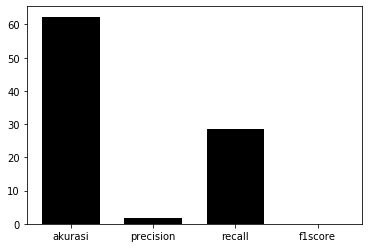

In [41]:
labels = ['akurasi','precision','recall','f1score']
values = [compute_akurasi(tp,tn,fn,fp ),compute_precision(tp,fp),compute_recall(tp,fn),compute_f1_score(df.prediksi, df.ujimanual)]
position = [0,1,2,3]
plt.bar (position, values, width=0.7, color='black')
plt.xticks(position,labels)
plt.show()

In [ ]:
1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111
             1111111111110000000000000000000000000000000000000000000000000000000000000000000000000000
             0000000000000000000000000111000000000100000000100000000000000000100000000000000000000000
             000100010000000000010000000010000000

In [ ]:
#we will train a svm classifier
highest_accuracy = 0
best_state = 0
for i in range(23):
    clf = svm.SVC(gamma ='scale',probability=True, random_state =22)
    clf.fit(X_train, y_train)
    accuracy = roc_auc_score(y_valid, clf.predict_proba(X_valid) [:,1])
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy    
        best_state = 22
print(best_state, highest_accuracy)